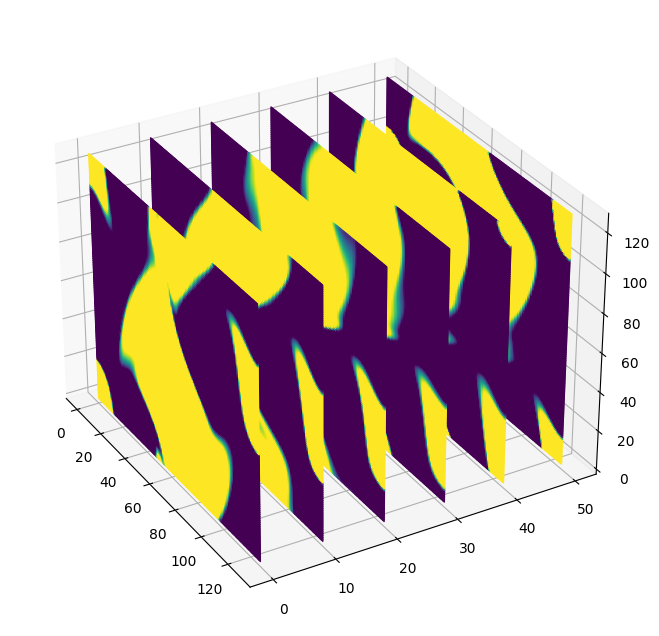

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py

# Open the file 'myfile.h5' in read-only mode
rbc_file = h5py.File('../datasets/rbc_diff_IC/rbc_IC1/rbc_3407_s4.h5', 'r')
# Get the data
data = rbc_file['tasks']['vorticity'][()]
data = data[::40,::4,::4]
gap_scale = 5
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# For each time step
for t in range(data.shape[0]):
    # Create the x, y coordinates
    x = np.arange(data.shape[1])
    z = np.arange(data.shape[2])
    x, z = np.meshgrid(x, z)
    
    # Offset z (time) by the time step
    y = 2*np.ones(x.shape) * t * gap_scale
    
    # Plot the surface for this time step
    ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.viridis(data[t]), shade=False,cmap = "viridis")

# Set the view angle
ax.view_init(elev=30., azim=-30)

plt.show()


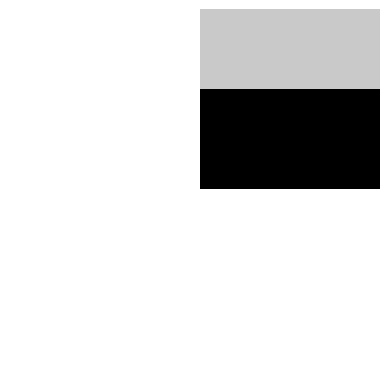

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some example data
T, H, W = 10, 20, 20
data = np.random.rand(T, H, W)  # replace this with your data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Remove the box
ax.grid(False)
ax.axis('off')

# Set the colorscale
cmap = plt.get_cmap('gray')

for t in range(T):
    # Create a 2D image for each frame at a different y-level
    img = data[t]
    # Need to first flip the image over the x-axis 
    # because the y-axis is flipped in the 3D plot
    img = np.flipud(img)
    # Then plot the image at y = t
    ax.imshow(img, cmap=cmap, extent=[0, W, t, t+1], origin='lower')

# Display only the axes
ax.set_xlabel('X')
ax.set_zlabel('Z')
ax.set_ylabel('Time')

# Set the viewpoint
ax.view_init(elev=20, azim=-35)

# Change aspect ratio
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 2, 1, 1]))

plt.show()
